<a href="https://colab.research.google.com/github/carson-edmonds/AAI-521-Sports-Image-Classification/blob/main/Steve-Dataset_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-processing

In [2]:
!pip install -q kaggle
!pip install -q patool

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split
import patoolib

# Data visualization
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from google.colab import files

In [ ]:
# get api key from kaggle
# upload kaggle.json that was generated from kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishikeshkonapure/sports-image-dataset/
! mkdir kaggle_data
! unzip /content/sports-image-dataset.zip -d kaggle_data

In [2]:
data_dir = '/content/kaggle_data/data'
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

In [1]:
# resize images with grayscale into 100 * 100
img_size = 244
# Function to resize images
def resize_image(img_array, width, height):
    return cv2.resize(img_array,(img_size,img_size), 1)

def covert_to_rgb(img_raw):
    return cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

# df['img_raw'].apply(lambda x: covert_to_rgb(x))

# Resize images and append them as a new column
resized_img_raw = df['img_raw'].apply(lambda x: resize_image(x, img_size, img_size))
# df['resized_img_rgb'] = df['img_rgb'].apply(lambda x: resize_image(x, img_size, img_size))
resized_img_grey = df['img_grey'].apply(lambda x: resize_image(x, img_size, img_size))

NameError: ignored

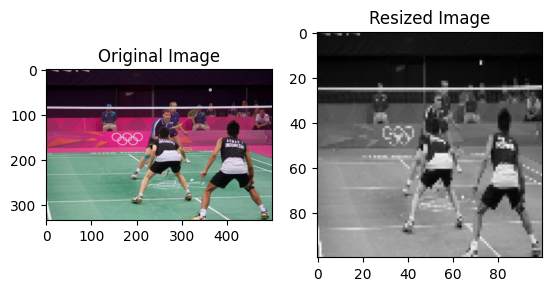

In [7]:
# Display the original and resized images for the first row
plt.subplot(1, 2, 1)
plt.imshow(covert_to_rgb(df['img_raw'][0]))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_grey[0], cmap='gray')
plt.title('Resized Image')

plt.show()

In [3]:
#create training data
training_data_raw = []
training_data_gray =[]
img_size = 244

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)
        for img in os.listdir(path):
            try:
                # Read original images
                img_raw = cv2.imread(os.path.join(path,img))
                img_raw_resized = cv2.resize(img_raw,(img_size,img_size))
                training_data_raw.append([img_raw_resized,class_num])

                # Read images as grayscale
                img_gray = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_gray_resized = cv2.resize(img_gray,(img_size,img_size))
                training_data_gray.append([img_gray_resized,class_num])

            except Exception as e:
                pass
    # return (img_raw, img_raw_resized, class_num), (img_gray, img_gray_resized, class_num)

create_training_data()
print("training data size", len(training_data_raw))

training data size 14271


In [4]:
print("training data size", len(training_data_gray))

training data size 14271


In [7]:
#shuffle all the training data
random.shuffle(training_data_gray)
for sample in training_data_gray[:2]:
    print(sample) #print first 5

[array([[57, 55, 55, ..., 58, 55, 56],
       [56, 55, 55, ..., 58, 54, 56],
       [56, 55, 56, ..., 58, 54, 57],
       ...,
       [64, 64, 64, ..., 72, 72, 72],
       [62, 62, 62, ..., 73, 72, 72],
       [60, 60, 60, ..., 74, 73, 73]], dtype=uint8), 17]
[array([[ 54,  55,  46, ...,  34,  28,  28],
       [ 53,  51,  49, ...,  45,  32,  36],
       [ 50,  47,  51, ...,  51,  40,  36],
       ...,
       [203, 203, 203, ..., 196, 194, 193],
       [204, 205, 203, ..., 197, 194, 200],
       [206, 203, 202, ..., 198, 193, 197]], dtype=uint8), 10]


In [ ]:
#creating lable and features - for color

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data_raw:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
x = np.array(x).reshape(-1,img_size,img_size,1)
y = np.array(y)


# normalize inputs from 0-255 to 0-1
x = x/255.0

<ipython-input-6-e06565115dbb>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y, label))


Before converting into numpy array:


In [5]:
#creating lable and features - for gray

x_gray=[] #features
y_gray=[] #label
#y = np.array(y)

for features,label in training_data_gray:
    x_gray.append(features)
    y_gray.append(label)
    np.array((y_gray, label))

print("Before converting into numpy array:")
print("X gray (img)", x_gray[0])
print("Y gray (category)", y_gray[0])
x_gray = np.array(x_gray).reshape(-1,img_size,img_size,1)
y_gray = np.array(y_gray)


# normalize inputs from 0-255 to 0-1
x_gray = x_gray/255.0

print("After Normalizing and converting into numpy array:")
print("X shape", x_gray.shape)
print("Y shape", y_gray.shape)

<ipython-input-5-461b541ef4ab>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y_gray, label))


Before converting into numpy array:
X gray (img) [[178 178 178 ... 148 145 145]
 [177 177 177 ... 147 145 145]
 [176 176 176 ... 145 145 145]
 ...
 [140 139 139 ...  91  91  90]
 [140 139 139 ...  91  90  89]
 [140 139 139 ...  91  90  88]]
Y gray (category) 0
After Normalizing and converting into numpy array:
X shape (14271, 244, 244, 1)
Y shape (14271,)


## Save with Pickle

In [ ]:
#Optional Save the x and y

In [ ]:
#dumping data into pickle file
#x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
#y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
#pickle_out = open(x_location,"wb") #path to save pickle file
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle file for label
#pickle_out = open(y_location,"wb") #path to save pickle file
#pickle.dump(y,pickle_out)
#pickle_out.close()

In [ ]:
#importing data (pickle) files x and y
#pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
#x = pickle.load(pickle_in)


#pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
#y = pickle.load(pickle_in)

## Train Test Split

In [ ]:
#create a split of data for the model fit and training
# train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

train_x_gray,test_x_gray, train_y_gray,test_y_gray = train_test_split(x_gray,y_gray,test_size=0.2)

print(type(train_x_gray))
print(type(test_x_gray))
print(train_x_gray.shape)
print(test_x_gray.shape)

In [ ]:
test_y_cat = to_categorical(test_y)
train_y_cat = to_categorical(train_y)
print("one hot encoded for categorial")
print(train_y_cat[1])
print(len(train_y_cat[0]))

##Object Detection

In [ ]:
#Clone yolo 8 and check all dependencies
!pip install ultralytics
import ultralytics
ultralytics.checks()

In [ ]:
#Train YOLO8 model
from ultralytics import YOLO
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=3, verbose=False)

In [ ]:
#Test model on images from test dataset
from IPython.display import Image
metrics = model.val()

In [ ]:
def obj_det(image_path):
  results = model(source=image_path,save=True, save_txt=True, project='runs/detect', name='predict', exist_ok=True)
  N = 12
  img_numb = image_path[-N:]
  return Image(filename='/content/runs/detect/predict/'+img_numb,width=600)

In [ ]:
obj_det('/content/kaggle_data/data/tennis/00000007.jpg')

In [ ]:
obj_det('/content/kaggle_data/data/formula1/00000023.jpg')

In [ ]:
obj_det('/content/kaggle_data/data/baseball/00000028.jpg')

In [ ]:
obj_det('/content/kaggle_data/data/gymnastics/00000055.jpg')

#Building Classification model

Resnet does get rescaled 1/255

efficientNet does not require image rescale

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
data_dir =


train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       labels='inferred',
                                                       image_size=(180,180),
                                                       validation_split=0.2,
                                                       subset="training",
                                                       seed=58)

In [ ]:
def display_img(train_ds):
  class_names = train_ds.class_names
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      image_np = np.array(images[i], dtype=np.float32) / 255.0 # converting to numpy and scaling values
      plt.imshow(image_np)   # Needed to use a converted image
      plt.title(class_names[labels[i]])
      plt.axis("off")

display_img(train_ds)

In [7]:
def create_training_data_2(df, resized_img_raw, resized_img_grey):
  IMAGE_SHAPE = (224, 224)
  BATCH_SIZE = 32

  #This is for resnet
  train_datagen_res = ImageDataGenerator(rescale=1/255.)
  test_datagen_res = ImageDataGenerator(rescale=1/255.)



  #This is for efficientNet, which does not require image rescaling.
  # train_datagen_eff = ImageDataGenerator(rescale=None)
  # test_datagen_eff = ImageDataGenerator(rescale=None)

  x = df[['img_raw', 'img_grey']]
  y = df['category_index']

  train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

  print("one hot encoded for categorial")
  test_y_cat = to_categorical(test_y)
  train_y_cat = to_categorical(train_y)

  print("type of x ", type(test_x))
  # print("value of test_x", test_x[0])
  print("type of y ", type(test_y))
  # print("value of test_x", test_y[0])
  print("type of test_y_cat", type(test_y_cat))
  print("value of test_y_cat", train_y_cat[1])

  # Convert image data to NumPy arrays
  train_x_raw = np.array(train_x['img_raw'].apply(lambda x: np.array(x)).tolist())
  test_x_raw = np.array(test_x['img_raw'].apply(lambda x: np.array(x)).tolist())

  train_x_grey = np.array(train_x['img_grey'].apply(lambda x: np.array(x)).tolist())
  test_x_grey = np.array(test_x['img_grey'].apply(lambda x: np.array(x)).tolist())

  print("Training images for ResNet:")
  train_data_res = train_datagen_res.flow(train_x_raw, train_y_cat, batch_size=BATCH_SIZE)

  print("Testing images for ResNet:")
  test_data_res = test_datagen_res.flow(test_x_raw, test_y_cat, batch_size=BATCH_SIZE)

  # Data augmentation for EfficientNet
  train_datagen_eff = ImageDataGenerator(rescale=None)
  test_datagen_eff = ImageDataGenerator(rescale=None)

  print("Training images for EfficientNet:")
  train_data_eff = train_datagen_eff.flow(train_x_grey, train_y_cat, batch_size=BATCH_SIZE)

  print("Testing images for EfficientNet:")
  test_data_eff = test_datagen_eff.flow(test_x_grey, test_y_cat, batch_size=BATCH_SIZE)

  return train_data_res, test_data_res, train_data_eff, test_data_eff

train_data_res, test_data_res, train_data_eff, test_data_eff = create_training_data_2(df, resized_img_raw, resized_img_grey)

NameError: ignored

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

def create_model(model_url, num_classes=len(categories)): #Since there are 7 output classes in this dataset
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(100,100)+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model